# Seasonally-varying circulation

The dataset that we will be using is here: Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/Monthlies/pressure/catalog.html

Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html

### Read longterm mean zonal (u) and meridional wind data

In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [2]:
# longterm mean u and v
file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/uwnd.mon.ltm.nc'
file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/vwnd.mon.ltm.nc'

with xr.open_dataset(file1) as ds1:
    print(ds1)
    u=ds1.uwnd # Unit is m/s
    #print(u)
    
with xr.open_dataset(file2) as ds2:
    #print(ds2)
    v=ds2.vwnd # Unit is m/s
    #print(v)

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    uwnd                (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    title:                          monthly mean u wind from the NCEP Reanalysis
    description:                    Data from NCEP initialized reanalysis (4x...
    platform:                       Model
    Conventions:                    COARDS
    NCO:                            20121012
    history:                        Created 20

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


### Calculate annual and zonal averages

In [3]:
u_lat_ann=u.mean(["time","lon"]) # annual and zonal average u
v_lat_ann=v.mean(["time","lon"]) # annual and zonal average u
u_lat=u.mean("lon") # monthly zonal average u
v_lat=v.mean("lon") # monthly and zonal average u

### Creating a line plot of upper atmospheric u

In [4]:
#Let's check the level
ds1.level
#Let's find a level closest to 200 hPa.
np.argmin((ds1.level.data-200)**2) #ds1.level.data becomes a numpy array

9

(-90.0, 90.0)

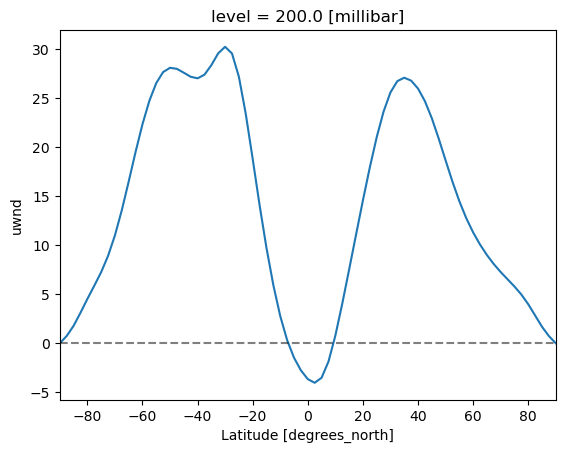

In [5]:
u_lat_ann.isel(level=9).plot()
plt.plot([-90,90],[0,0],'k--',alpha=0.5)
plt.xlim(-90,90)

### Angular momentum conserving wind
angular momentum = (u + omega_earth x r_earth x cos(lat)) x r_earth x cos(lat) </br>
At equator (stationary air mass): omega_earth x r_earth^2 </br>
u=omega x r_earth x (1-cos(lat)^2)/cos(lat) </br>
=omega x r_earth*sin(lat)^2)/cos(lat)


In [6]:
print(ds1.lat)

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y


<xarray.DataArray 'lat' (lat: 71)>
array([ 87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,  65. ,
        62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,  40. ,
        37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,  15. ,
        12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5, -10. ,
       -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5, -35. ,
       -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5, -60. ,
       -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. ,
       -87.5], dtype=float32)
Coordinates:
  * lat      (lat) float32 87.5 85.0 82.5 80.0 77.5 ... -80.0 -82.5 -85.0 -87.5
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y


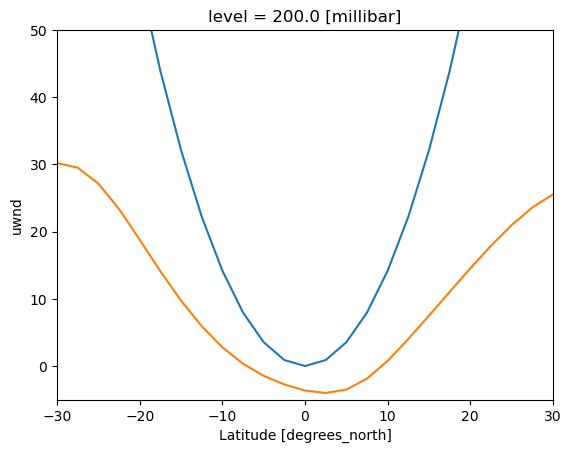

In [7]:
omega_earth=2.*np.pi/24./3600. # angular velocity of the Earth
r_earth=6.370e6     # radius of the earth
x=ds1.lat[1:-1]     # exluding the poles 
print(x)
u2=omega_earth*r_earth*(np.sin(np.deg2rad(x))**2)/np.cos(np.deg2rad(x))
plt.plot(x,u2)
plt.ylim(-5,50)
plt.xlim(-30,30)
u_lat_ann.isel(level=9).plot()  # reanalysis wind

## Seasonal stream function

In [8]:
# Let's first calculate mass stream function
lat=ds1.lat.values
ny = len(lat)
nlev= len(ds1.level)
p=ds1.level.values
pf=np.zeros(nlev+1) # pressure at the boundary
pf[0]=p[0]
pf[1:nlev]=(p[:nlev-1]+p[1:nlev])/2.
pf[nlev]=2.  # arbtrary low value
print(ny,nlev,len(p),pf)

g = 9.8
a = 6.37e6
cosphi = np.cos(lat*np.pi/180.)

73 17 17 [1000.   962.5  887.5  775.   650.   550.   450.   350.   275.   225.
  175.   125.    85.    60.    40.    25.    15.     2. ]


In [9]:
dp = np.zeros((nlev-1))
dp[0:nlev-1] = abs(pf[0:nlev-1]-pf[1:nlev])*100.
print(dp)

[ 3750.  7500. 11250. 12500. 10000. 10000. 10000.  7500.  5000.  5000.
  5000.  4000.  2500.  2000.  1500.  1000.]


In [12]:
# For January
psi_jan = np.zeros((nlev-1,ny))
print(psi_jan.shape)
for j in range(ny):
    for k in range(nlev-2,0,-1):
        psi_jan[k-1,j] = psi_jan[k,j] + 2.*np.pi*a*cosphi[j]*v_lat.isel(time=0).values[k,j]/g*dp[k]*1.e-10

(16, 73)


Text(0, 0.5, 'Pressure (Pa)')

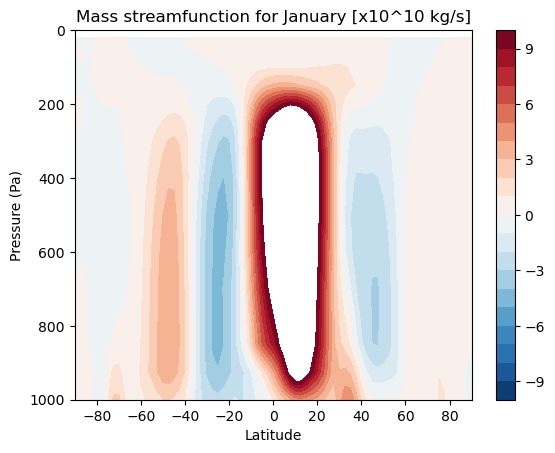

In [13]:
cmap1=plt.cm.RdBu_r
Lat,Lev=np.meshgrid(lat,p[0:nlev-1])
lev1=np.arange(-10,11,1)
plt.contourf(Lat, Lev, psi_jan, lev1, cmap=cmap1)
plt.colorbar()

plt.ylim([1000,0])
plt.title('Mass streamfunction for January [x10^10 kg/s]') # positive sign, clockwise motion
plt.xlabel('Latitude')
plt.ylabel('Pressure (Pa)')

In [16]:
# For July
psi_jul = np.zeros((nlev-1,ny))
print(psi_jul.shape)
for j in range(ny):
    for k in range(nlev-2,0,-1):
        psi_jul[k-1,j] = psi_jul[k,j] + 2.*np.pi*a*cosphi[j]*v_lat.isel(time=6).values[k,j]/g*dp[k]*1.e-10

(16, 73)


Text(0, 0.5, 'Pressure (Pa)')

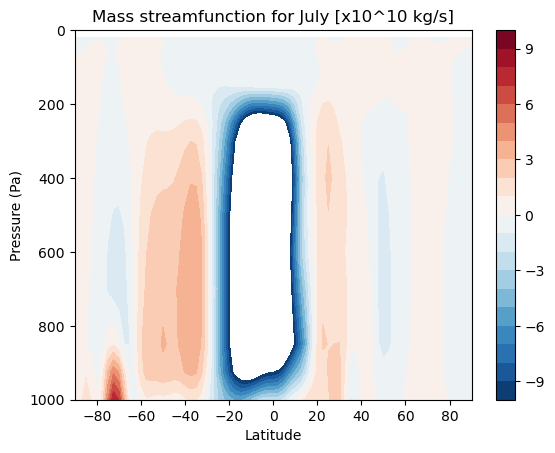

In [17]:
Lat,Lev=np.meshgrid(lat,p[0:nlev-1])
lev1=np.arange(-10,11,1)
plt.contourf(Lat, Lev, psi_jul, lev1, cmap=cmap1)
plt.colorbar()

plt.ylim([1000,0])
plt.title('Mass streamfunction for July [x10^10 kg/s]') # positive sign, clockwise motion
plt.xlabel('Latitude')
plt.ylabel('Pressure (Pa)')

### Problem 1
Explain the season differences in circulation using the January and July mass stream function plots.